## Bike Sharing Case Study ##

Boom Bikes is, A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. Bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. 



## Problem Statement ##

The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. Boom Bikes would like to determine

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

## Objectives and Constraints ##

You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

## Step 1 : Data Exploration ##

We will first explore the Data Set for understanding the data and perform EDA

In [1]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split



bike_df = pd.read_csv('day.csv')

In [2]:
bike_df.shape

(730, 16)

In [3]:
bike_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [4]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
#Exploring other variables 

bike_df['weekday'].value_counts()

6    105
1    105
0    105
5    104
4    104
2    104
3    103
Name: weekday, dtype: int64

In [6]:
bike_df.mnth.value_counts()

12    62
10    62
8     62
7     62
5     62
3     62
1     62
11    60
9     60
6     60
4     60
2     56
Name: mnth, dtype: int64

In [7]:
bike_df.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,1,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,1,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,1,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


**Observations** :
  - The DataSet is clean and there are no null or missing values. 
  - The **weekday** mapping starts from Tuesday:0, Wed:1, Thu: 2 and so on , and ends on Monday:6 
  - **Casual** and **Registered** are post facto the event. This will not be useful for predicting the demand and can be dropped
  - **dteday** is already available in **yr, month, weekday** and so can be dropped as well after initial analysis
  - <mark>cnt</mark> is the predicted variable. 
  - **instant** is the record count and is not useful for prediction

## Step 2 : Data Cleansing and Type Correction ##

**Drop Unneeded Variables**
   - We will drop **casual**, **registered**, **dteday** based on the findings of Data Exploration

In [8]:
bike_df.drop([ 'casual', 'registered','dteday'], inplace=True, axis=1)
bike_df.drop([ 'instant'], inplace=True, axis=1)

**Convert to Categorical Variables**

- weathersit : 
 - 1: Clear, Few clouds, Partly cloudy, Partly cloudy : w_clear
 - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist : w_cloudy_misty
 - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds : w_l_snow_rain
 - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog : w_h_rain_fog
 
- season
  - season (1:s_spring, 2:s_summer, 3:s_fall, 4:s_winter)
    
- month
 - Based on the Calenday Month Count with January starting as 1

In [9]:
bike_df['weathersit'].value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [10]:
bike_df.weathersit = bike_df.weathersit.map({1:'w_clear', 2:'w_cloudy_misty', 3:'w_l_snow_rain', 4:'w_h_rain_fog'})
bike_df.season = bike_df.season.map({1:'s_spring', 2:'s_summer', 3:'s_fall', 4:'s_winter'})


In [11]:
bike_df.weekday = bike_df['weekday'].map({3:'Friday',4:'Sat',5:'Sunday',6:'Monday',0:'Tuesday',1:'Wednesday',2:'Thursday'})
bike_df.mnth = bike_df['mnth'].map({1:'Jan',2:'Feb', 3:'Mar', 4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sept',10:'Oct',11:'Nov',12:'Dec'})

In [12]:
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,s_spring,0,Jan,0,Monday,0,w_cloudy_misty,14.110847,18.18125,80.5833,10.749882,985
1,s_spring,0,Jan,0,Tuesday,0,w_cloudy_misty,14.902598,17.68695,69.6087,16.652113,801
2,s_spring,0,Jan,0,Wednesday,1,w_clear,8.050924,9.47025,43.7273,16.636703,1349
3,s_spring,0,Jan,0,Thursday,1,w_clear,8.200000,10.60610,59.0435,10.739832,1562
4,s_spring,0,Jan,0,Friday,1,w_clear,9.305237,11.46350,43.6957,12.522300,1600


In [13]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


## Step 3. Exploratory Data Analysis ##


In [14]:
c_var  = ['workingday', 'weathersit', 'season','holiday', 'mnth', 'weekday', 'yr' ]
n_var  = [ 'temp','atemp','hum','windspeed']

print("Categorical Variables : {}".format(c_var))
print("Numeric  Variables : {}".format(n_var))
len(c_var)+len(n_var)

Categorical Variables : ['workingday', 'weathersit', 'season', 'holiday', 'mnth', 'weekday', 'yr']
Numeric  Variables : ['temp', 'atemp', 'hum', 'windspeed']


11

In [15]:
#Common Imports

import matplotlib.pyplot as plt
import seaborn as sns
import warnings


warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')


In [16]:
#Common Functions

def plot_box(cat_var_list, by, others_par = None):
    n_rows = 3
    n_cols = 3
    fig, axes = plt.subplots(n_rows,n_cols, figsize= (n_rows*10, n_cols*8))
    sns.reset_defaults()
    for i in range(0, n_rows):
        for j in range(0,n_cols):
            n = i*n_cols + j
            #print(n, i, j, len(n_var))
            if (n <  len(cat_var_list)):
            #print("inside len")
                sns.boxplot(x = cat_var_list[n], y= by, data=bike_df, ax = axes[i][j])
                sns.set(font_scale=2.0)
            else :
                break

    plt.tight_layout() 
    plt.show()


**Visualizing Categorical Variables**

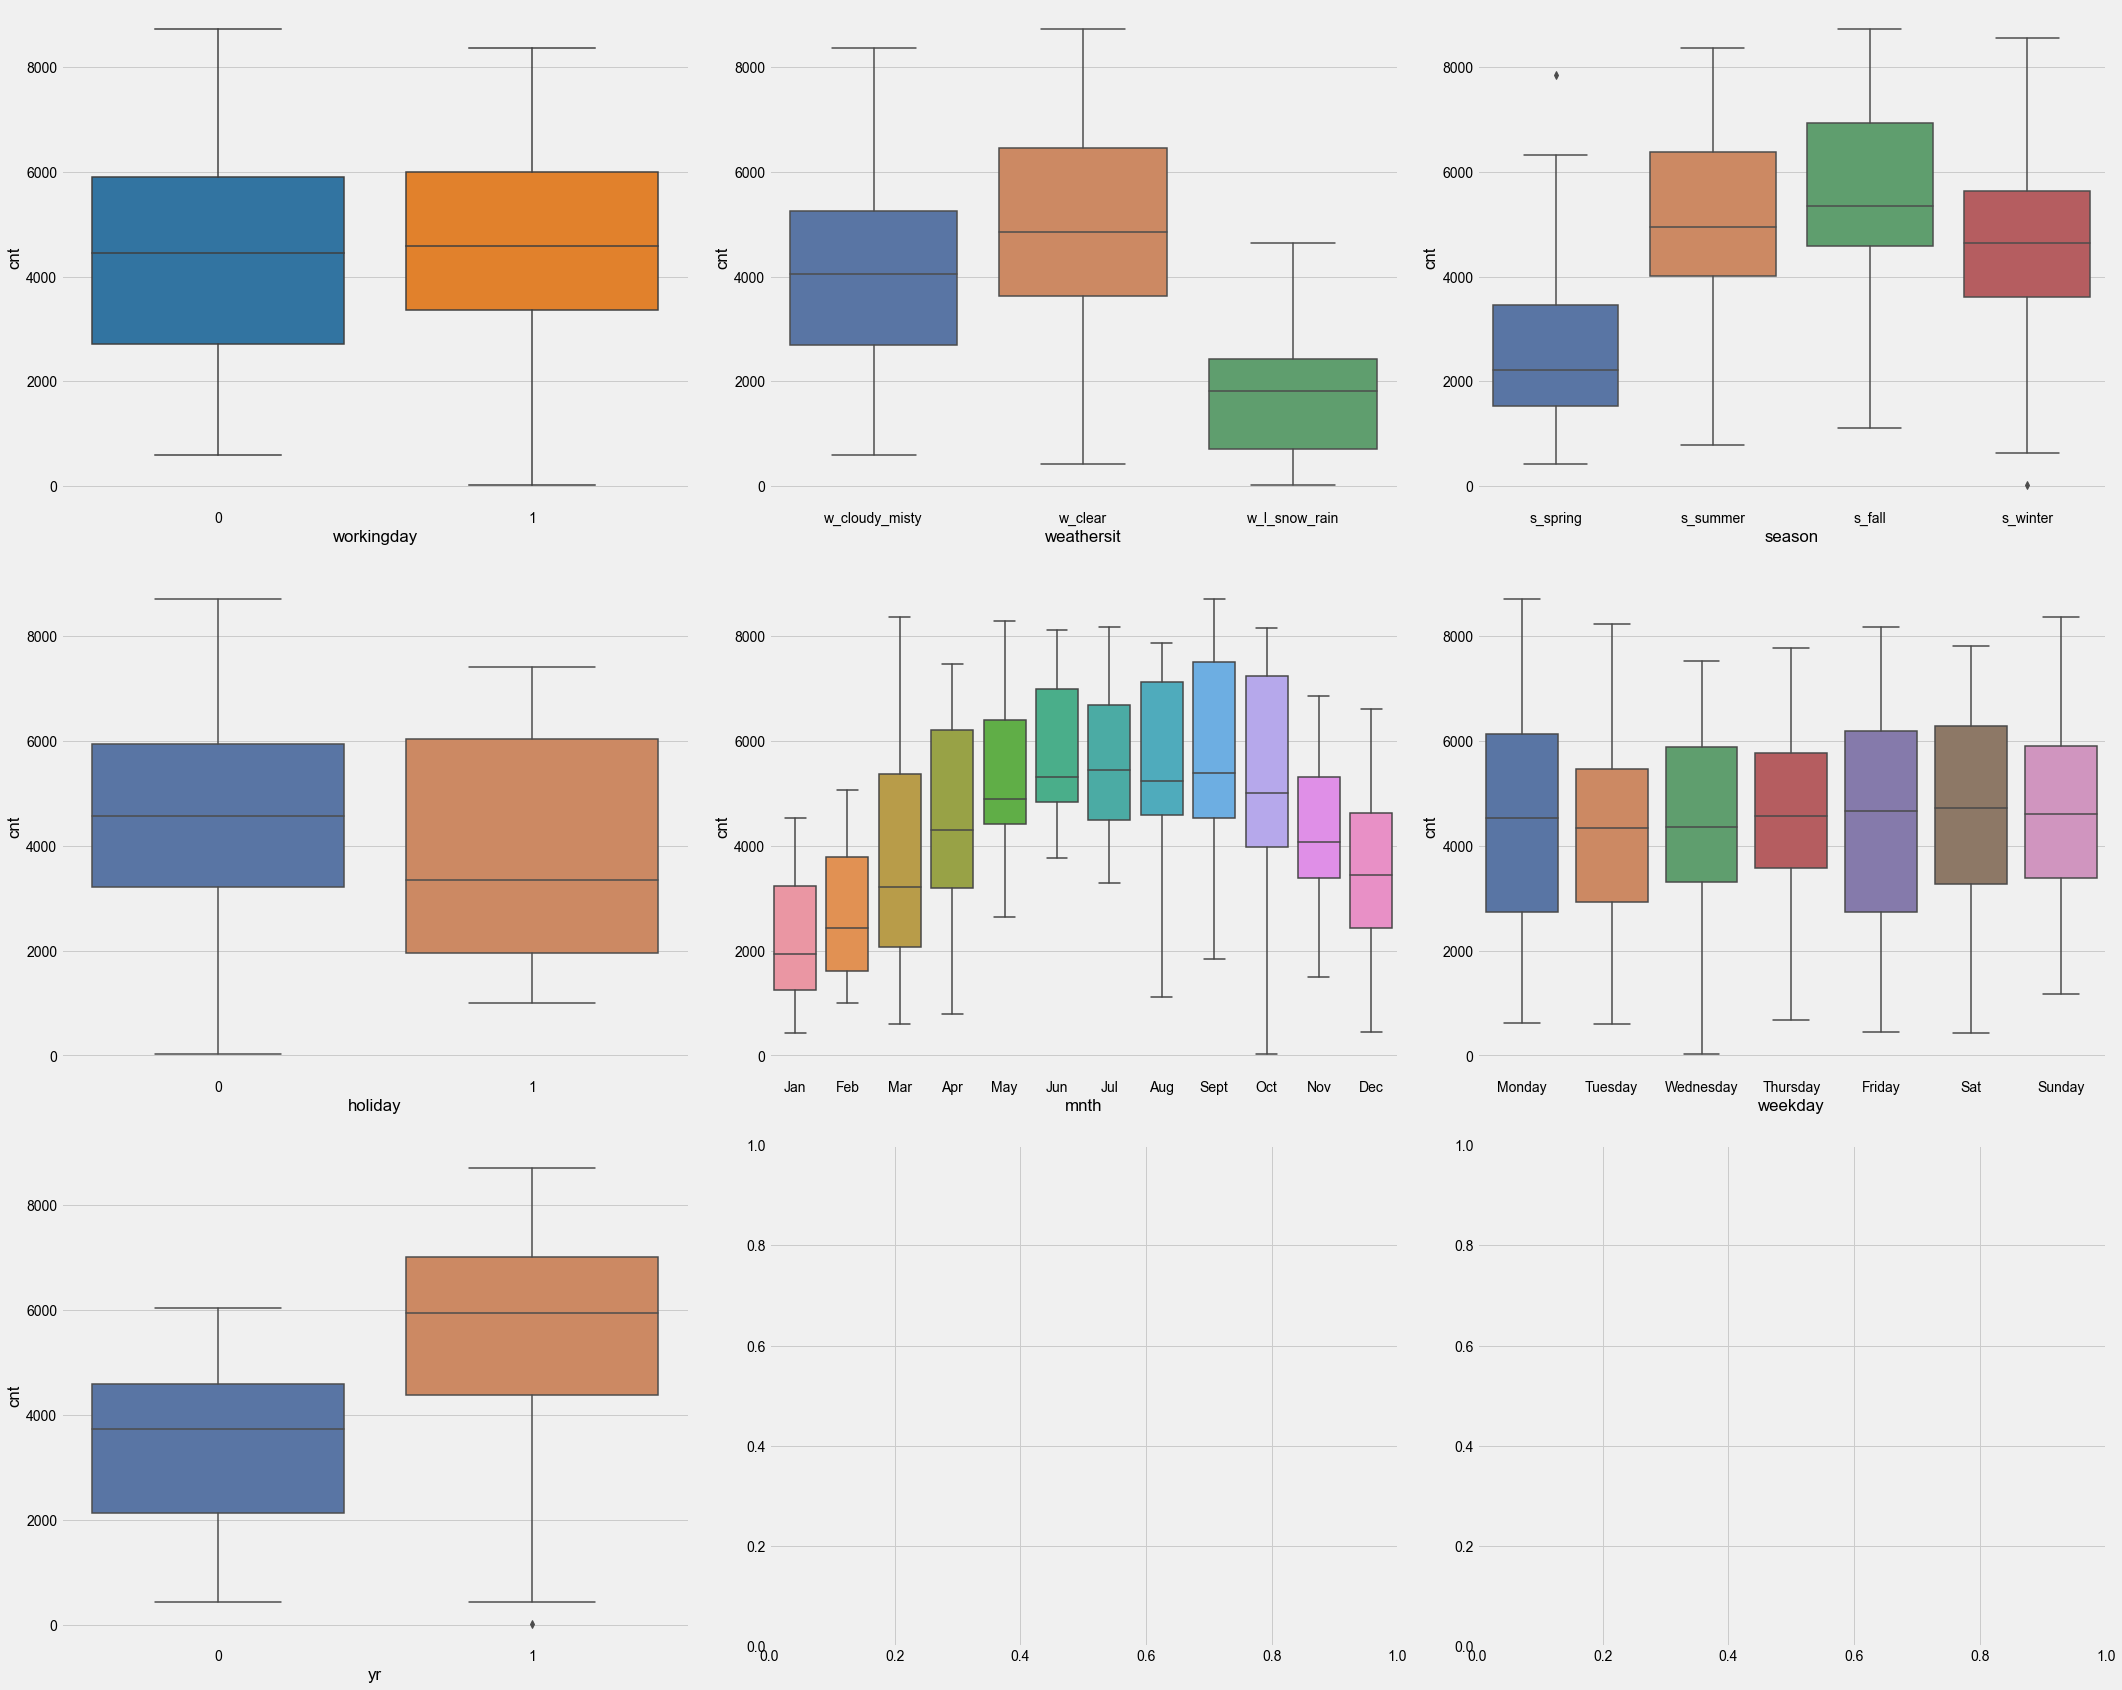

In [17]:
#plot_box(var = 'working_day')
plot_box(c_var, by= 'cnt')

<AxesSubplot:xlabel='weekday', ylabel='sum_weeks'>

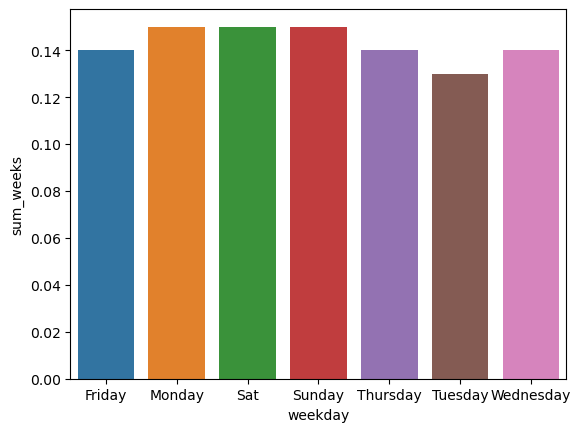

In [18]:
from sklearn import preprocessing
scaled_weekday = bike_df.groupby('weekday')['cnt'].agg(['sum']).rename(columns={'sum':'sum_weeks'}).reset_index()

total = scaled_weekday.sum_weeks.sum()
scaled_weekday.sum_weeks = scaled_weekday.sum_weeks.apply(lambda x : round(x/total,2))
sns.reset_defaults()
sns.barplot(data=scaled_weekday, x = 'weekday', y='sum_weeks')

<AxesSubplot:xlabel='mnth', ylabel='sum_month'>

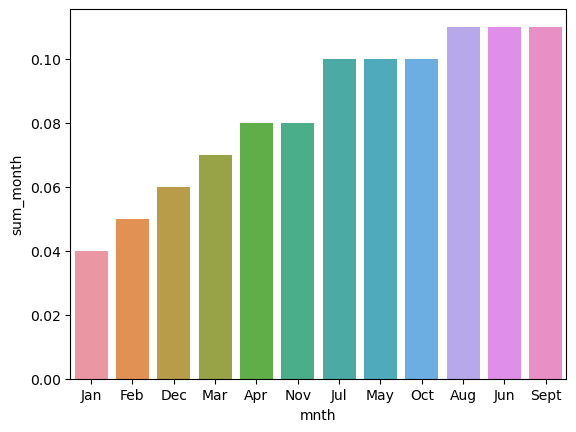

In [19]:
from sklearn import preprocessing
scaled_month = bike_df.groupby('mnth')['cnt'].agg(['sum']).rename(columns={'sum':'sum_month'}).reset_index()

total = scaled_month.sum_month.sum()
scaled_month.sum_month = scaled_month.sum_month.apply(lambda x : round(x/total,2))
scaled_month = scaled_month.sort_values(['sum_month'])
sns.reset_defaults()
sns.barplot(data=scaled_month, x = 'mnth', y='sum_month')


**Observations**

   1. Snow and Rain reduces the count of the Rental Bikes
   2. Fall the highest Traffic, followed by Summer, Winter. Strangely Spring has the least traffic, we can see if this turns out to be significant when we look at the models. *Seasons* could be good predictor Variable, but they are not marketable
   4. December - March account for only Lowest Traffic, of around 4% to 6%. Months could be one of the predictor variable
   5. 12% to 14% of traffic is distributed around every day. This points to the fact that weekday or weekend may not be one of the predictor variables. We will corroborate that later. 
   6. Traffic is showing an increasing trend. But this needs to be corrobarated over the years
 


**Visualizing Numeric Variables**

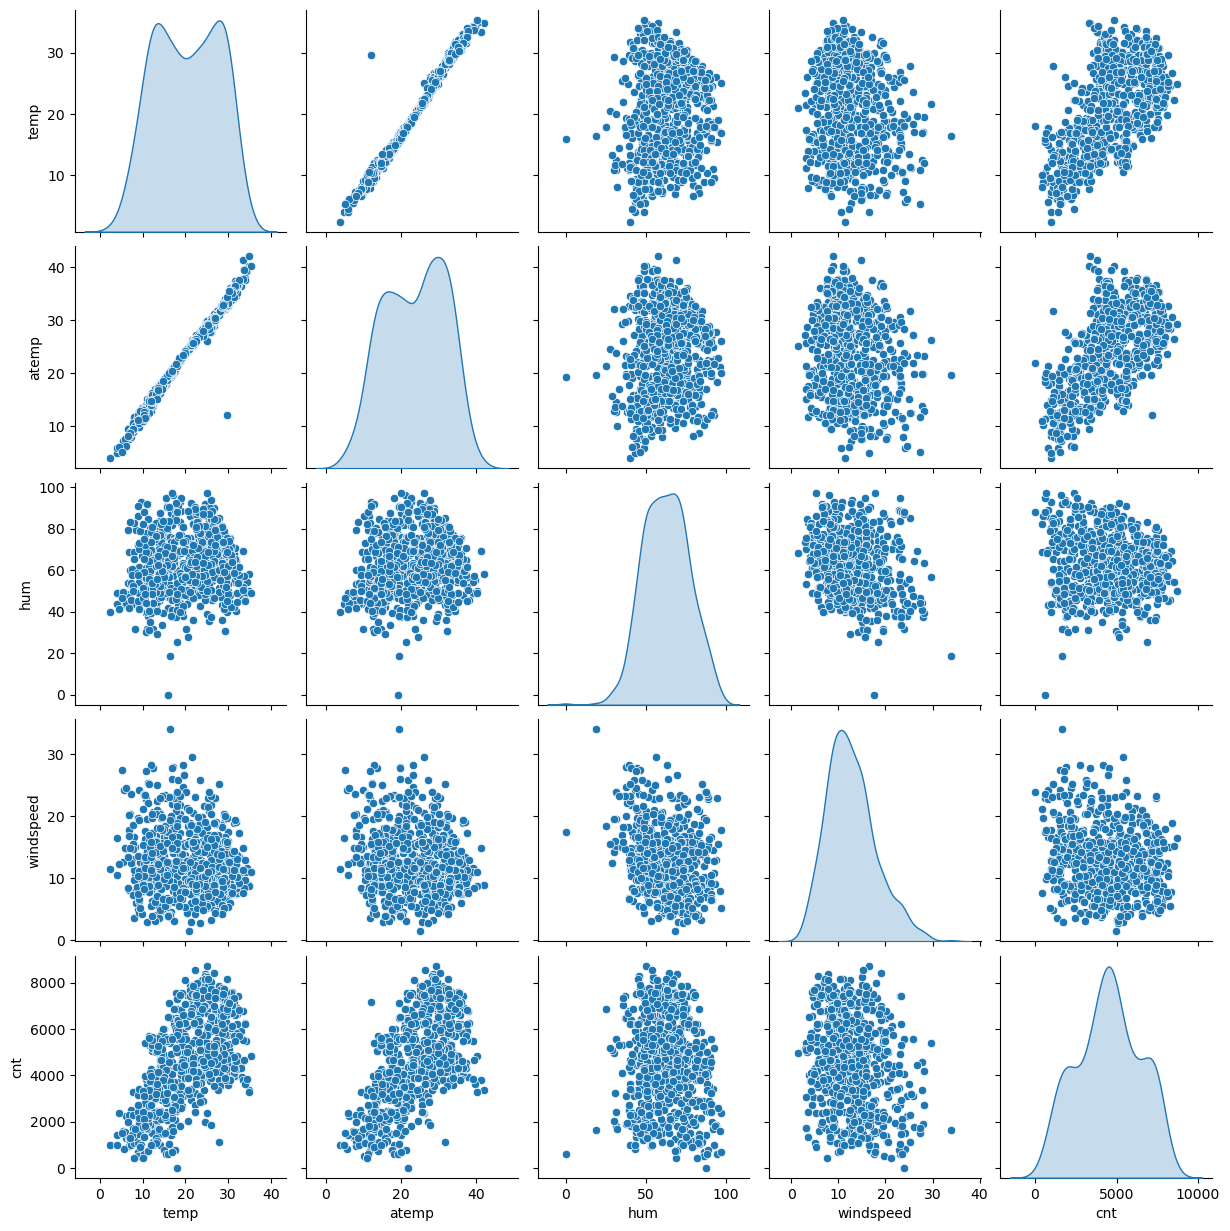

In [66]:
sns.reset_defaults()
sns.pairplot(data=bike_df, vars = [ 'temp','atemp','hum','windspeed', 'cnt'], diag_kind='kde' )

**Observations**

 1. There is a bimodal distribution in temperature, which means there are two different peaks.  
 2. There is a very close relationship between **temp** and **atemp**. So one of them should be eliminated which we can observer in RFE

## Step 4: Data Preparation ####

**Creating Dummy Variables** 

Now we will create dummy variables for all the categorical variables
We will create dummies for **weathersit, season,month, weekday** 
We will ignore **holiday, yr** as both have only binary values

In [21]:
#common function to create dummy variables
#c_var  = ['workingday', 'weathersit', 'season','holiday', 'mnth', 'weekday', 'yr' ]
def create_dummy(x, df):
    dummy = pd.get_dummies(df[x], drop_first= True)
    df= pd.concat([df,dummy], axis =1)
    df.drop([x], axis=1, inplace = True)
    return df

In [22]:
bike_df = create_dummy('weathersit', bike_df)

In [23]:
bike_df = create_dummy('season', bike_df)
bike_df = create_dummy('mnth', bike_df)
bike_df = create_dummy('weekday', bike_df)

In [24]:
bike_df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,w_cloudy_misty,w_l_snow_rain,...,May,Nov,Oct,Sept,Monday,Sat,Sunday,Thursday,Tuesday,Wednesday
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
bike_df.shape

(730, 30)

**Initial Co Relation Plot for Initial Analysis of multi colleanarity**

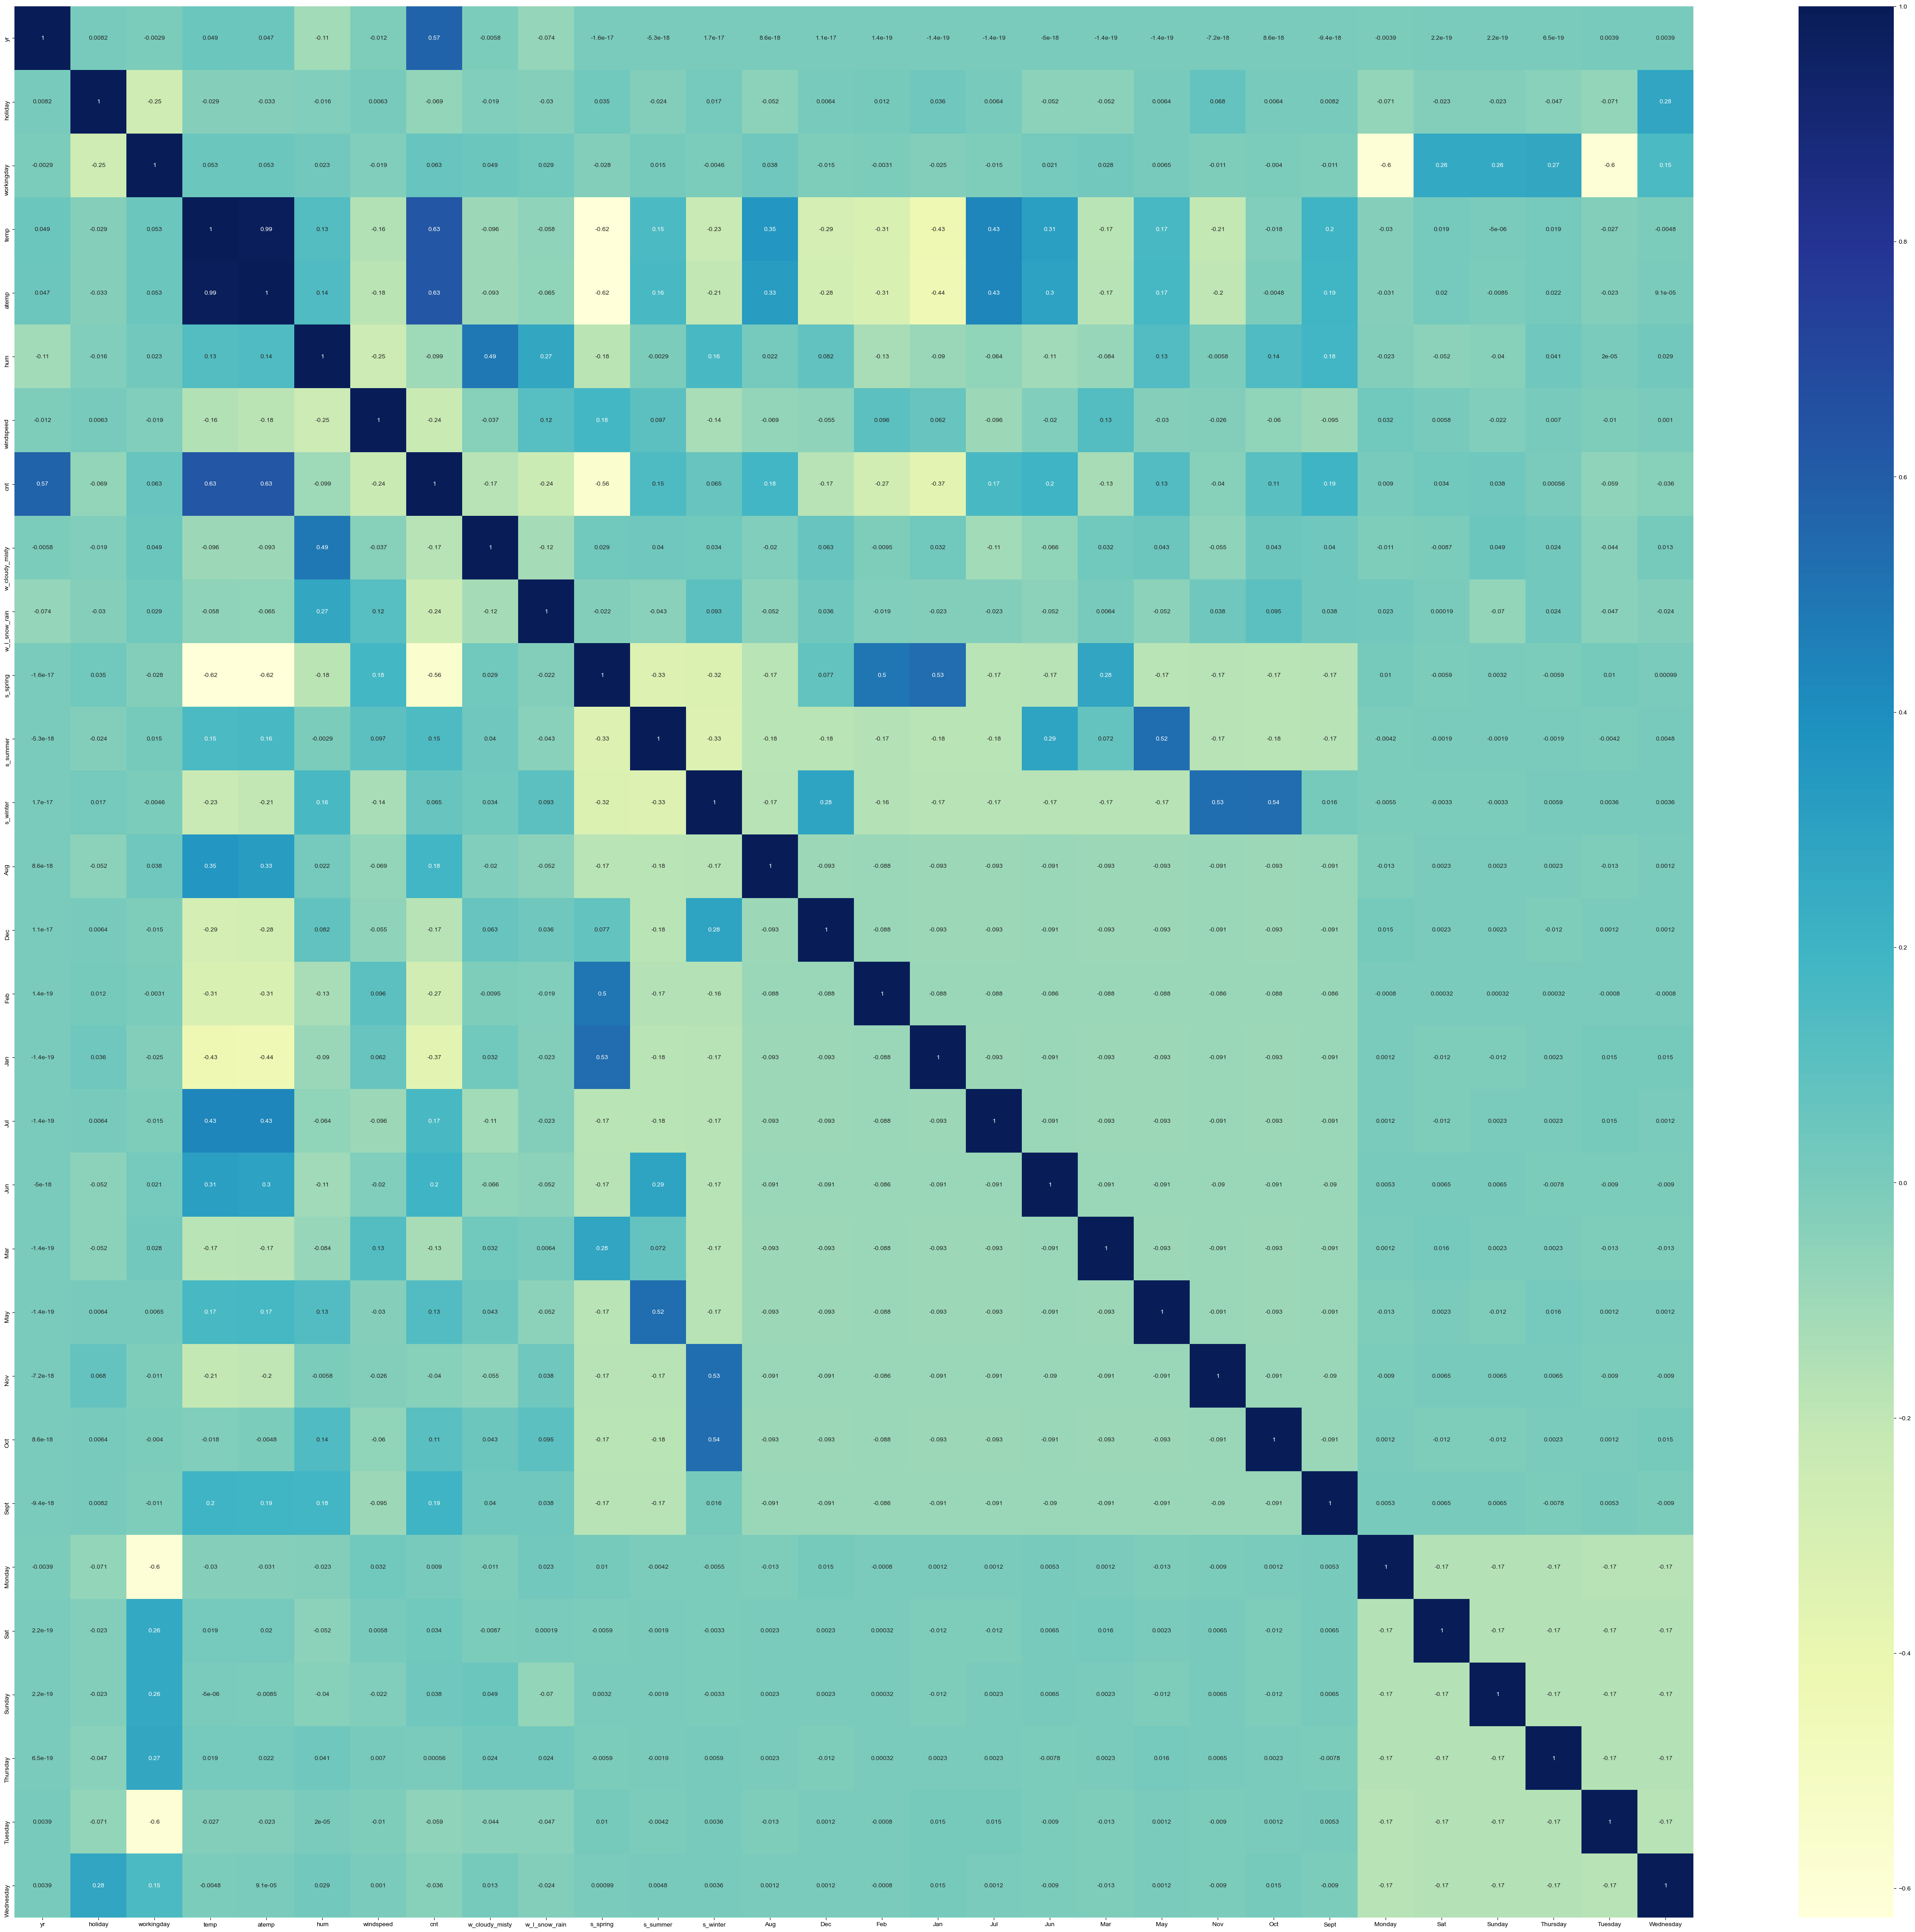

In [26]:
plt.figure(figsize = (60,55))
corr = bike_df.corr()
sns.heatmap(data=corr, annot=True, cmap="YlGnBu")
sns.set(font_scale=2.0)
plt.show()

**Observation** : 
- We have used a 3 color character map to understand the range of the correlation
- Overall there is lot of Greens means there is *lot of correlation* between the variables
    - Eg Winter and November are correlated
    - Jan and Temp are negatively correlated.
- We will use this in our further analysis, to eliminate variables 

In [27]:
from sklearn.model_selection import train_test_split

#Dividing into Train and Test 
np.random.seed(0)
df_train, df_test = train_test_split(bike_df, train_size = 0.7, test_size= 0.3,random_state = 100)

In [28]:
df_train.shape

(510, 30)

In [29]:
df_test.shape

(219, 30)

**Rescaling the Features**

We will use Min Max Scaling

In [30]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

#All variables (including features/predictors and target variable should be scaled uniformly)
num_var  = [ 'temp','atemp','hum','windspeed', 'cnt']
df_train[num_var] = scaler.fit_transform(df_train[num_var])
df_train[num_var].head()

,temp,atemp,hum,windspeed,cnt
653,0.509887,0.501133,0.575354,0.300794,0.864243
576,0.815169,0.766351,0.725633,0.264686,0.827658
426,0.442393,0.438975,0.640189,0.255342,0.465255
728,0.245101,0.200348,0.498067,0.663106,0.204096
482,0.395666,0.391735,0.504508,0.188475,0.482973


In [31]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,w_cloudy_misty,w_l_snow_rain,...,May,Nov,Oct,Sept,Monday,Sat,Sunday,Thursday,Tuesday,Wednesday
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620,0.343137,0.029412,...,0.084314,0.086275,0.086275,0.080392,0.154902,0.133333,0.127451,0.131373,0.143137,0.150980
std,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593,0.475223,0.169124,...,0.278131,0.281045,0.281045,0.272166,0.362166,0.340268,0.333805,0.338139,0.350557,0.358381
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Now all the features are scaled, and we can now start training the data.

## Step 5: Model Training ##

We will use Balanced Approach for the same. First we will short list features using RFE and then reduce the same using combination of logica and P/R2/Prob of F values.

Splitting Training DF into X and Y for model building

In [32]:
#Common Imports
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression


In [33]:
#Creating X, Y for Training
y_train = df_train.pop('cnt')
X_train = df_train

In [34]:
#Initialization of SM and RFE

lm = LinearRegression()
lm.fit(X_train,y_train)

#Lets start with a list of 15 variables
rfe= RFE(lm,15)
rfe = rfe.fit(X_train, y_train)

#Now we will use this and check for the R2 and other metrics using stats model

In [35]:
#Find out the RFE Variables
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 5),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('w_cloudy_misty', True, 1),
 ('w_l_snow_rain', True, 1),
 ('s_spring', True, 1),
 ('s_summer', True, 1),
 ('s_winter', True, 1),
 ('Aug', False, 7),
 ('Dec', False, 3),
 ('Feb', False, 4),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', False, 11),
 ('Mar', False, 14),
 ('May', False, 6),
 ('Nov', False, 2),
 ('Oct', False, 10),
 ('Sept', True, 1),
 ('Monday', True, 1),
 ('Sat', False, 12),
 ('Sunday', False, 8),
 ('Thursday', False, 15),
 ('Tuesday', False, 9),
 ('Wednesday', False, 13)]

In [36]:
 X_train.columns[rfe.support_]

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'w_cloudy_misty', 'w_l_snow_rain', 's_spring', 's_summer', 's_winter',
       'Jan', 'Jul', 'Sept', 'Monday'],
      dtype='object')

In [37]:
 X_train.columns[~rfe.support_]

Index(['atemp', 'Aug', 'Dec', 'Feb', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sat',
       'Sunday', 'Thursday', 'Tuesday', 'Wednesday'],
      dtype='object')

In [38]:
#Now we will use this and check for the R2 and other metrics using stats model
import statsmodels.api as sm
X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_train_rfe = sm.add_constant(X_train_rfe)

lm  = sm.OLS(y_train, X_train_rfe).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.6
Date:                Sun, 07 Mar 2021   Prob (F-statistic):          2.31e-191
Time:                        10:32:39   Log-Likelihood:                 519.88
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     494   BIC:                            -940.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2510      0.036      6.949      0.000       0.180       0.322
yr                 0.2305      0.008     28.807      0.000       0.215       0.246
holiday           -0.0585      0.027     -2.178      0.030      -0.111      -0.006
workingday         0.0435      0.012      3.781      0.000       0.021       0.066
temp               0.5098      0.034     14.851      0.000       0.442       0.577
hum               -0.1547      0.037     -4.145      0.000      -0.228      -0.081
windspeed         -0.1860      0.025     -7.301      0.000      -0.236      -0.136
w_cloudy_misty    -0.0578      0.010     -5.574      0.000      -0.078      -0.037
w_l_snow_rain     -0.2488      0.026     -9.560      0.000      -0.300      -0.198
s_spring          -0.0508      0.021     -2.461      0.014      -0.091      -0.010
s_summer           0.0497      0.015      3.346      0.001       0.020       0.079
s_winter           0.0944      0.017      5.479      0.000       0.061       0.128
Jan               -0.0343      0.017     -1.980      0.048      -0.068      -0.000
Jul               -0.0532      0.018     -2.947      0.003      -0.089      -0.018
Sept               0.0812      0.016      4.934      0.000       0.049       0.114
Monday             0.0537      0.014      3.707      0.000       0.025       0.082
==============================================================================
Omnibus:                       66.344   Durbin-Watson:                   2.071
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              161.565
Skew:                          -0.676   Prob(JB):                     8.25e-36
Kurtosis:                       5.403   Cond. No.                         22.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Since we have an R2 of 0.849, and Low p value, this is a good candidate to start. Lets use this as the base for our training. There are also negative coeff, which we will try to eliminate slowly**

In [39]:
#common functions 

import statsmodels.api as SM
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Build an SM Model and return the X Value
def build_sm_model(X, y):
    X = sm.add_constant(X)
    lm = sm.OLS(y,X).fit()
    print (lm.summary())
    return X

#Cal
def calculateVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    vif = vif.sort_values(by='VIF', ascending = False)
    return vif

In [40]:
calculateVIF(X_train_rfe)

,Features,VIF
0,const,84.59
9,s_spring,5.08
4,temp,3.89
11,s_winter,3.60
10,s_summer,2.64
5,hum,1.92
3,workingday,1.88
15,Monday,1.78
7,w_cloudy_misty,1.57
12,Jan,1.57


There are strong Multi collinearity issues here. Lets Drop **Jan** first and recalculate. 

**MODEL 2**

In [41]:
X_train_2 = X_train_rfe.drop(['Jan'], axis=1)

In [42]:
X_train_2= build_sm_model(X_train_2, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Sun, 07 Mar 2021   Prob (F-statistic):          1.13e-191
Time:                        10:32:39   Log-Likelihood:                 517.87
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     495   BIC:                            -942.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2394      0.036      6.

In [43]:
calculateVIF(X_train_2)

,Features,VIF
0,const,82.34
9,s_spring,5.02
4,temp,3.62
11,s_winter,3.49
10,s_summer,2.61
5,hum,1.91
3,workingday,1.88
14,Monday,1.78
7,w_cloudy_misty,1.57
12,Jul,1.49


**MODEL 3**

The model has converged, but the VIF Values are above 2. 
Lets drop **holiday** and check, as it has the next highest VIF Value


In [44]:
X_train_3 = X_train_2.drop(['holiday'], axis=1)
X_train_3= build_sm_model(X_train_3, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     209.4
Date:                Sun, 07 Mar 2021   Prob (F-statistic):          8.51e-192
Time:                        10:32:40   Log-Likelihood:                 515.37
No. Observations:                 510   AIC:                            -1003.
Df Residuals:                     496   BIC:                            -943.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2298      0.036      6.

In [45]:
calculateVIF(X_train_3)

,Features,VIF
0,const,81.13
8,s_spring,5.02
3,temp,3.62
10,s_winter,3.49
9,s_summer,2.61
4,hum,1.91
2,workingday,1.65
13,Monday,1.64
6,w_cloudy_misty,1.57
11,Jul,1.49


Spring **s_spring** has a high value VIF Value. It also has a comparatively low P Value. Let us try removing the same 

**MODEL 4**


Lets drop **Spring** which has the next highest VIF

In [46]:
X_train_4 = X_train_3.drop(['s_spring'], axis=1)
X_train_4= build_sm_model(X_train_4, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     223.3
Date:                Sun, 07 Mar 2021   Prob (F-statistic):          2.26e-191
Time:                        10:32:40   Log-Likelihood:                 511.55
No. Observations:                 510   AIC:                            -997.1
Df Residuals:                     497   BIC:                            -942.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1705      0.028      5.

In [47]:
calculateVIF(X_train_4)

,Features,VIF
0,const,51.12
4,hum,1.89
2,workingday,1.65
12,Monday,1.64
3,temp,1.60
6,w_cloudy_misty,1.56
10,Jul,1.43
8,s_summer,1.33
9,s_winter,1.29
7,w_l_snow_rain,1.24


Let us now drop Jul Month from the Model, as its corelated to Summer. It has also got a relatively high P value
**MODEL 5**

Lets drop **Jul** which has the next highest P Value

In [48]:
X_train_5 = X_train_4.drop(['Jul'], axis=1)
X_train_5= build_sm_model(X_train_5, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     240.6
Date:                Sun, 07 Mar 2021   Prob (F-statistic):          2.89e-191
Time:                        10:32:40   Log-Likelihood:                 508.45
No. Observations:                 510   AIC:                            -992.9
Df Residuals:                     498   BIC:                            -942.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1698      0.029      5.

In [49]:
calculateVIF(X_train_5)

,Features,VIF
0,const,51.12
4,hum,1.87
2,workingday,1.65
11,Monday,1.64
6,w_cloudy_misty,1.56
3,temp,1.27
9,s_winter,1.25
7,w_l_snow_rain,1.24
8,s_summer,1.19
5,windspeed,1.18


Looks like the model has converged well. R2 is good, P values are zero, Prob of F-Statistic <0.

**Lets plot a correlation plot to see if any other variables can be eliminated**

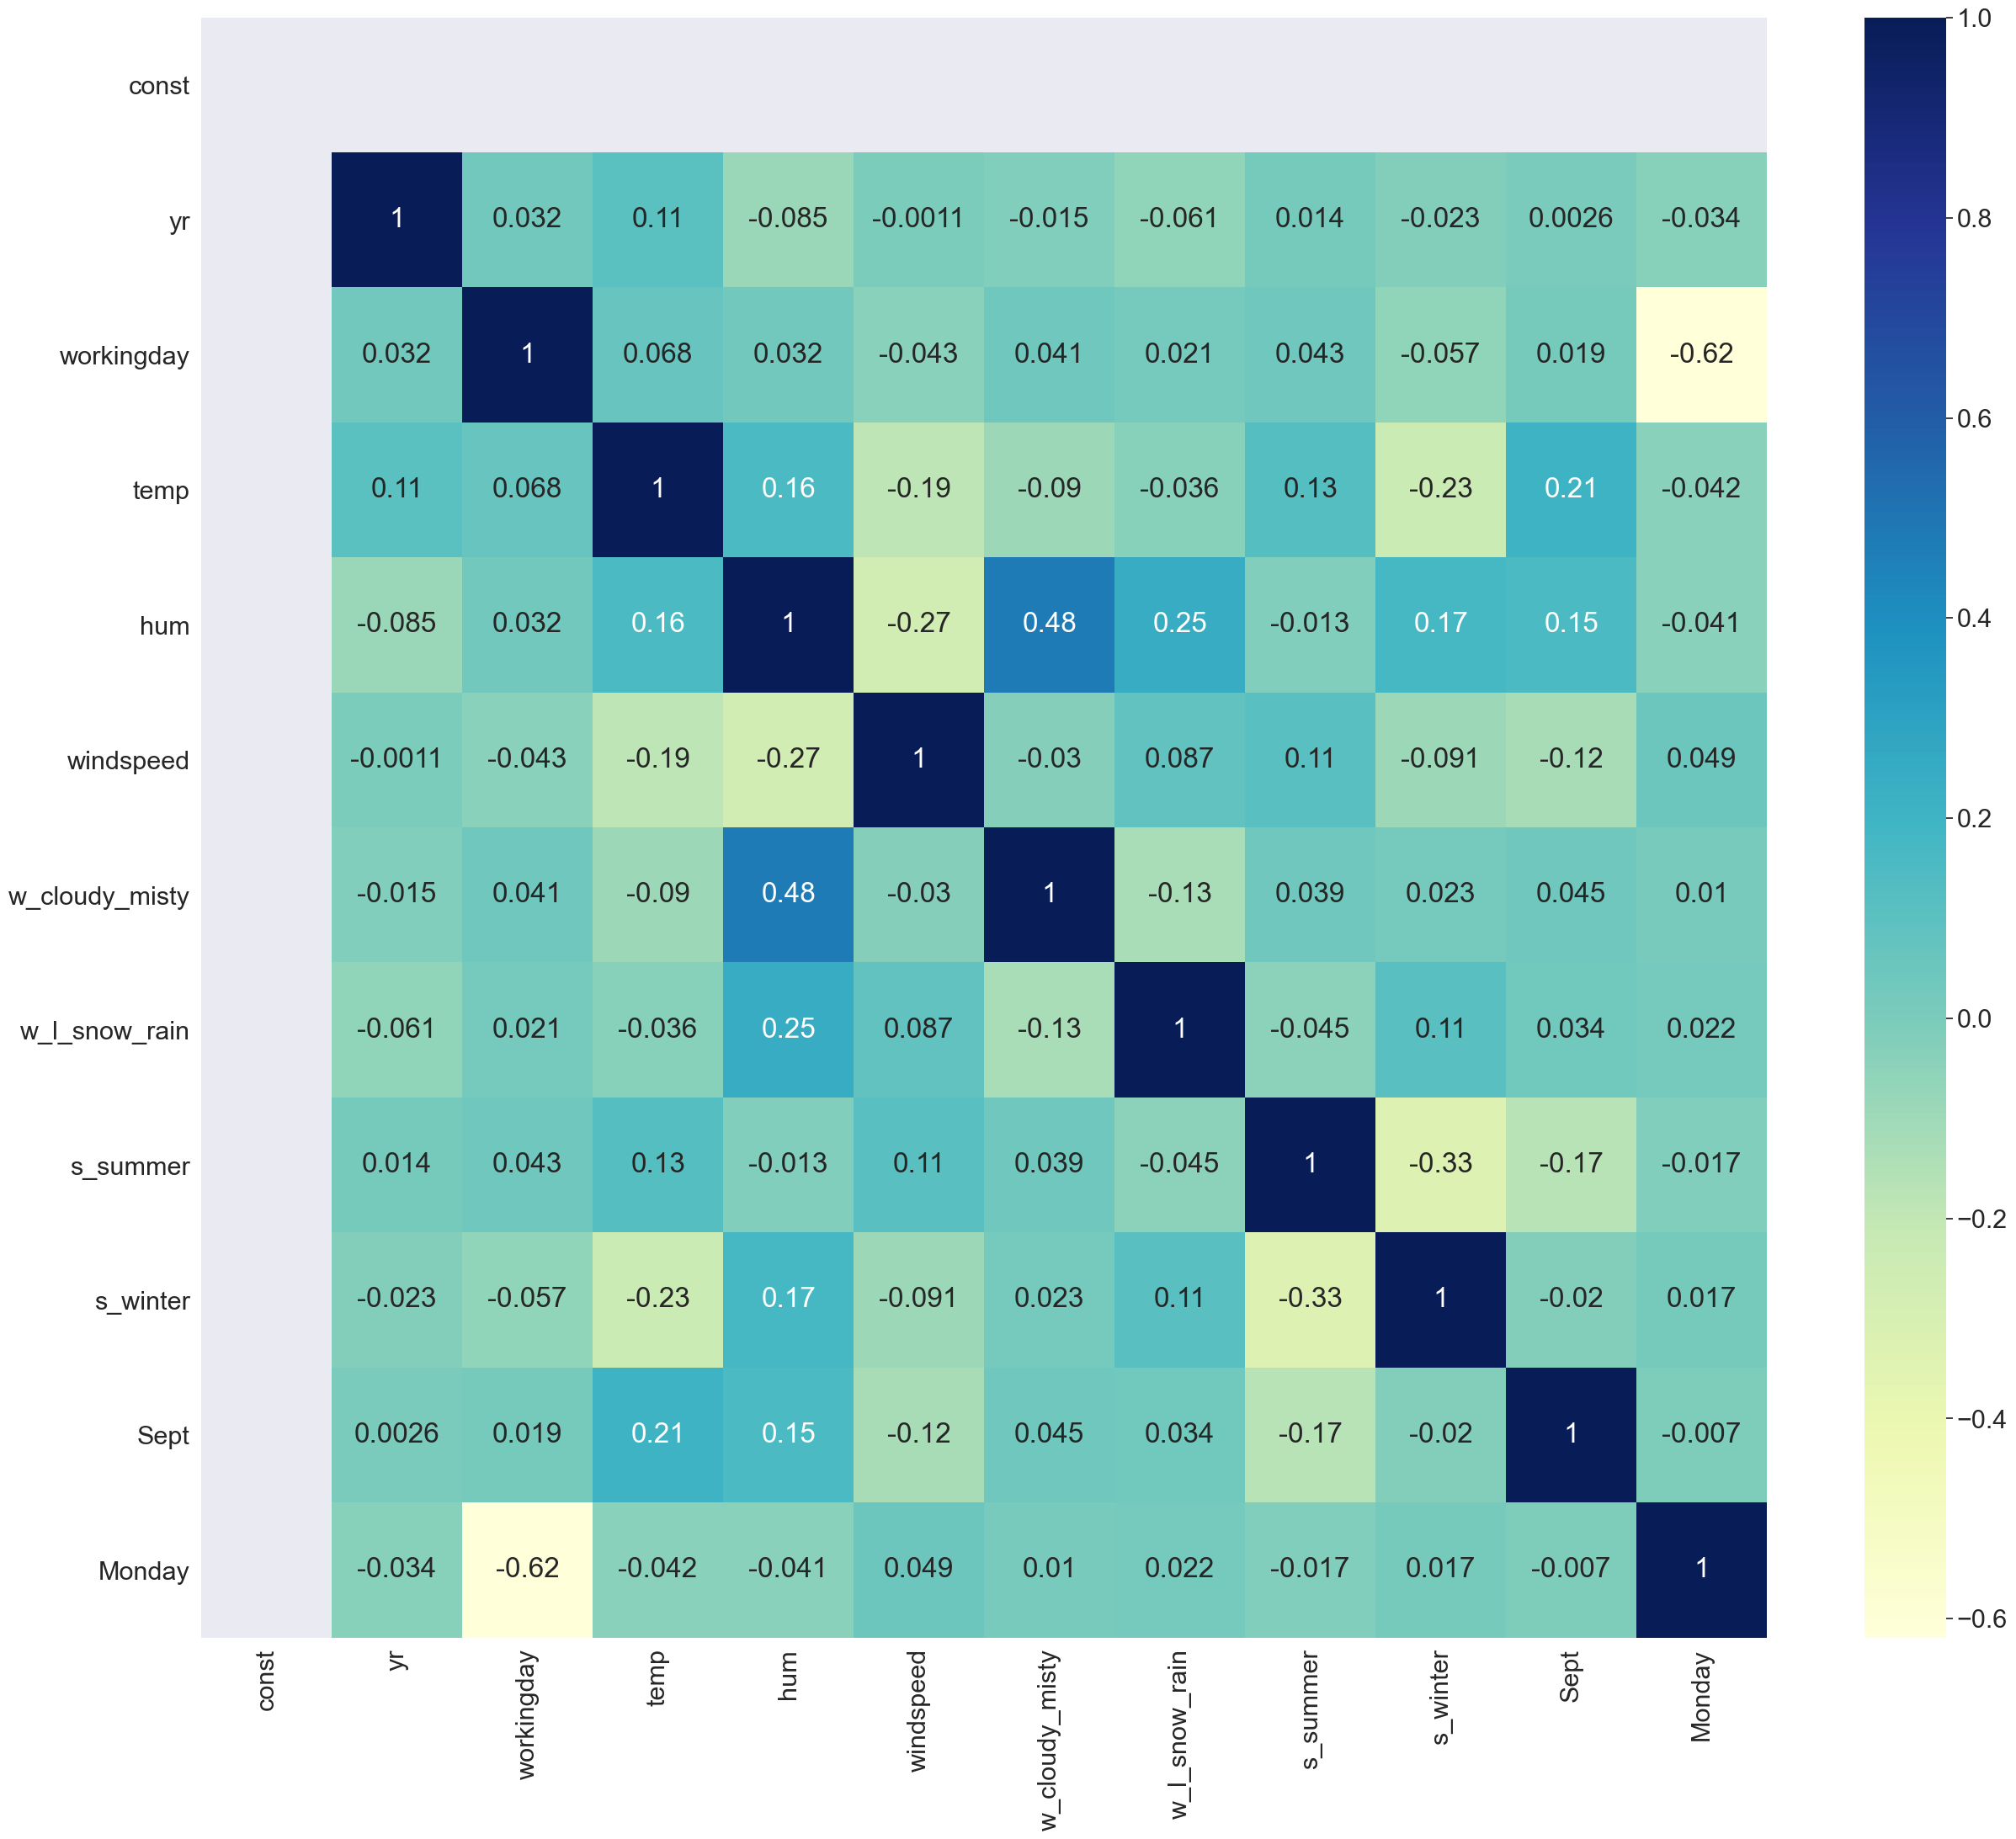

In [50]:
#Correlation using heatmap
plt.figure(figsize = (30, 25))
sns.heatmap(X_train_5.corr(), annot = True, cmap="YlGnBu")
plt.show()

There is a positive corelation between cloud_misty and hum. This makes sense, as weather parameters are related. Lets try removing one of them and see if there is an impact.

**MODEL 6**

Lets drop **hum**, and look at the impact

In [51]:

X_train_6 = X_train_5.drop(['hum'], axis=1)
X_train_6= build_sm_model(X_train_6, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     254.0
Date:                Sun, 07 Mar 2021   Prob (F-statistic):          1.47e-188
Time:                        10:32:41   Log-Likelihood:                 499.18
No. Observations:                 510   AIC:                            -976.4
Df Residuals:                     499   BIC:                            -929.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0753      0.019      4.

In [52]:
calculateVIF(X_train_6)

,Features,VIF
0,const,20.87
2,workingday,1.64
10,Monday,1.63
3,temp,1.20
8,s_winter,1.20
7,s_summer,1.19
9,Sept,1.10
4,windspeed,1.09
6,w_l_snow_rain,1.05
5,w_cloudy_misty,1.04


R2 has dropped to 0.836 from 0.842 which is **not** marginal.  Adjusted R2 dropped from  0.838 to 0.832  So this is not a significant loss in accuracy, in the larger scheme. 

But humidity is also marketable predictor as cloudy_misty weather. Therefore we will continue with the earlier model and try residual analysis.

**We will retain Model 5**. This makes logical sense. 

VIF Values are also within range. 
**Summary**
 - 10 major variables
 - adj R2 = 0.838 
 - VIF below 2
 - Prob (FStatistic) - Much below 0
 - P Value = 0 for all values

Lets try **residual analysis** next

## Step 6 - Residual Analysis ## 

In [53]:
lm1 = sm.OLS(y_train, X_train_5).fit()
y_train_cnt = lm1.predict(X_train_5)

Text(0.5, 0, 'Errors')

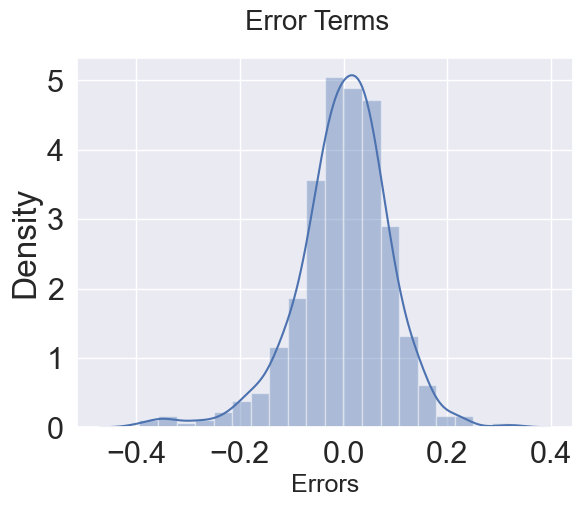

In [54]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)

Errors have a mean of 0, and also normally distributed. This assumption of linear modelling is fulfilled


## Step 7 : Prediction and Evaluation ##



In [55]:
#Scaling Test Set
num_vars = ['temp','atemp', 'hum', 'windspeed', 'cnt']
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

Split the Test Set into X and Y variables

In [56]:
y_test = df_test.pop('cnt')

In [57]:
X_test = df_test
X_test.shape

(219, 29)

In [58]:
X_train_5.columns
columnlist = X_train_5.drop('const', axis=1)

In [59]:
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[columnlist.columns]

In [60]:
X_test_new = sm.add_constant(X_test_new)
y_pred = lm1.predict(X_test_new)

- Calculate R2 and Adjusted R2

In [61]:
from sklearn.metrics import r2_score 
r2=r2_score(y_test, y_pred)
print(r2)

0.8058680916848985


- Adjusted R2

In [62]:
X_test_new.shape

(219, 12)

In [63]:
# We already have the value of R^2 (calculated in above step)
# n is number of rows in X
n = X_test_new.shape[0]

# Number of features (predictors, p) is the shape along axis 1
p = X_test_new.shape[1]

# We find the Adjusted R-squared using the formula

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.7945594368315916

**Evaluation of the Model**

Text(0, 0.5, 'y_pred')

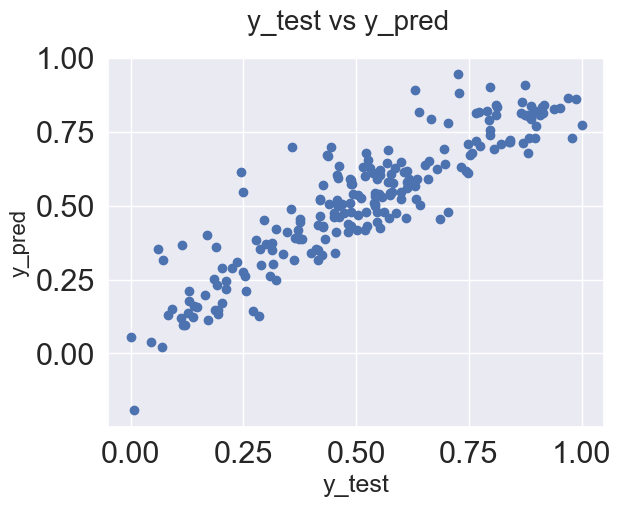

In [64]:
#EVALUATION OF THE MODEL
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16) 

### Final Results ###

- Train R^2 :0.842
- Train Adjusted R^2 :0.838
- Test R^2 :0.800
- Test Adjusted R^2 :0.794 

This looks likes a well generalized model which can cover most use cases

In [65]:
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     240.6
Date:                Sun, 07 Mar 2021   Prob (F-statistic):          2.89e-191
Time:                        10:32:41   Log-Likelihood:                 508.45
No. Observations:                 510   AIC:                            -992.9
Df Residuals:                     498   BIC:                            -942.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1698      0.029      5.937      0.000       0.114       0.226
yr                 0.2294      0.008     28.272      0.000       0.213       0.245
workingday         0.0536      0.011      4.875      0.000       0.032       0.075
temp               0.5709      0.020     28.559      0.000       0.532       0.610
hum               -0.1613      0.038     -4.295      0.000      -0.235      -0.087
windspeed         -0.1861      0.026     -7.259      0.000      -0.236      -0.136
w_cloudy_misty    -0.0553      0.011     -5.255      0.000      -0.076      -0.035
w_l_snow_rain     -0.2439      0.026     -9.250      0.000      -0.296      -0.192
s_summer           0.0899      0.010      8.859      0.000       0.070       0.110
s_winter           0.1407      0.010     13.575      0.000       0.120       0.161
Sept               0.1025      0.016      6.610      0.000       0.072       0.133
Monday             0.0630      0.014      4.450      0.000       0.035       0.091
==============================================================================
Omnibus:                       72.653   Durbin-Watson:                   2.088
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              167.950
Skew:                          -0.754   Prob(JB):                     3.39e-37
Kurtosis:                       5.372   Cond. No.                         20.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Conclusion ##

The Best Fit Line is as follows:

*cnt = 0.0536workingday+ 0.5709temp -0.1613hum -0.1861windspeed -0.0553w_cloudy_misty -0.2439w_l_snow_rain +0.0899s_summer + 0.1407s_winter + 0.1025Sept + 0.0630Monday*

Based on the best fit line, Boom Bikes will have more demand on 
- Winter and Summer are two seasons which predict good demand and should try to capitalize on them, using campaigns.
  - Focused campaigns can be run in summer or Winter when weather conditions are not bakd
- Its clear that bad weather affects demand, expecially when the is snow with rain, excessive windspeed, cloudy and misty environments
  - Its recommended that BoomBikes mitigate this and pause campaigns in this period
- The Best day to target/retarget is Monday, owing to a good correlation
- There is also a good correlation between September. So its good to focus on the same while doing campaigns